In [93]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

#Loads the data and quick check
train = pd.read_csv('.../SF Crime Data/SFtrain.csv',parse_dates=['Dates'] )
test = pd.read_csv('.../SF Crime Data/SFtest.csv',parse_dates=['Dates'])

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [94]:
#Basic data look
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [95]:
#Break out hour,week ,and year for easier graphing and grouping trends
train['Year'] = train['Dates'].map(lambda x: x.year)
train['Week'] = train['Dates'].map(lambda x: x.week)
train['Hour'] = train['Dates'].map(lambda x: x.hour)

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Week,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,20,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,20,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,20,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,20,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,20,23


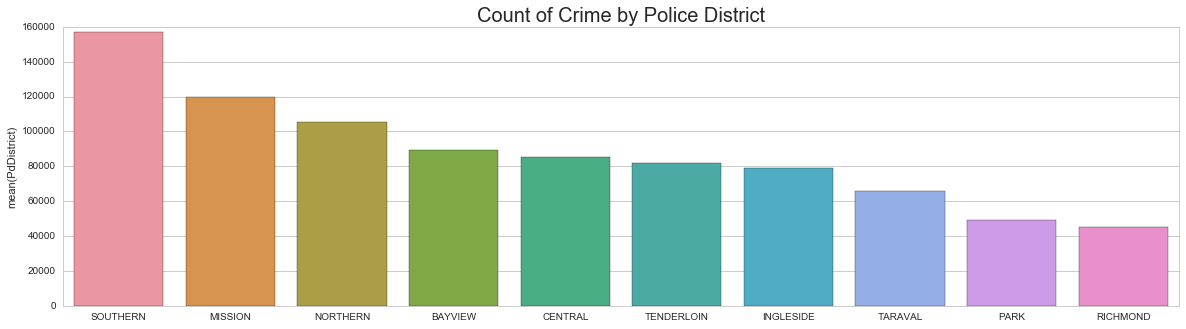

In [96]:
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
sns.barplot(x=train.PdDistrict.value_counts().index, y=train.PdDistrict.value_counts())
sns.plt.title('Count of Crime by Police District', size=20)

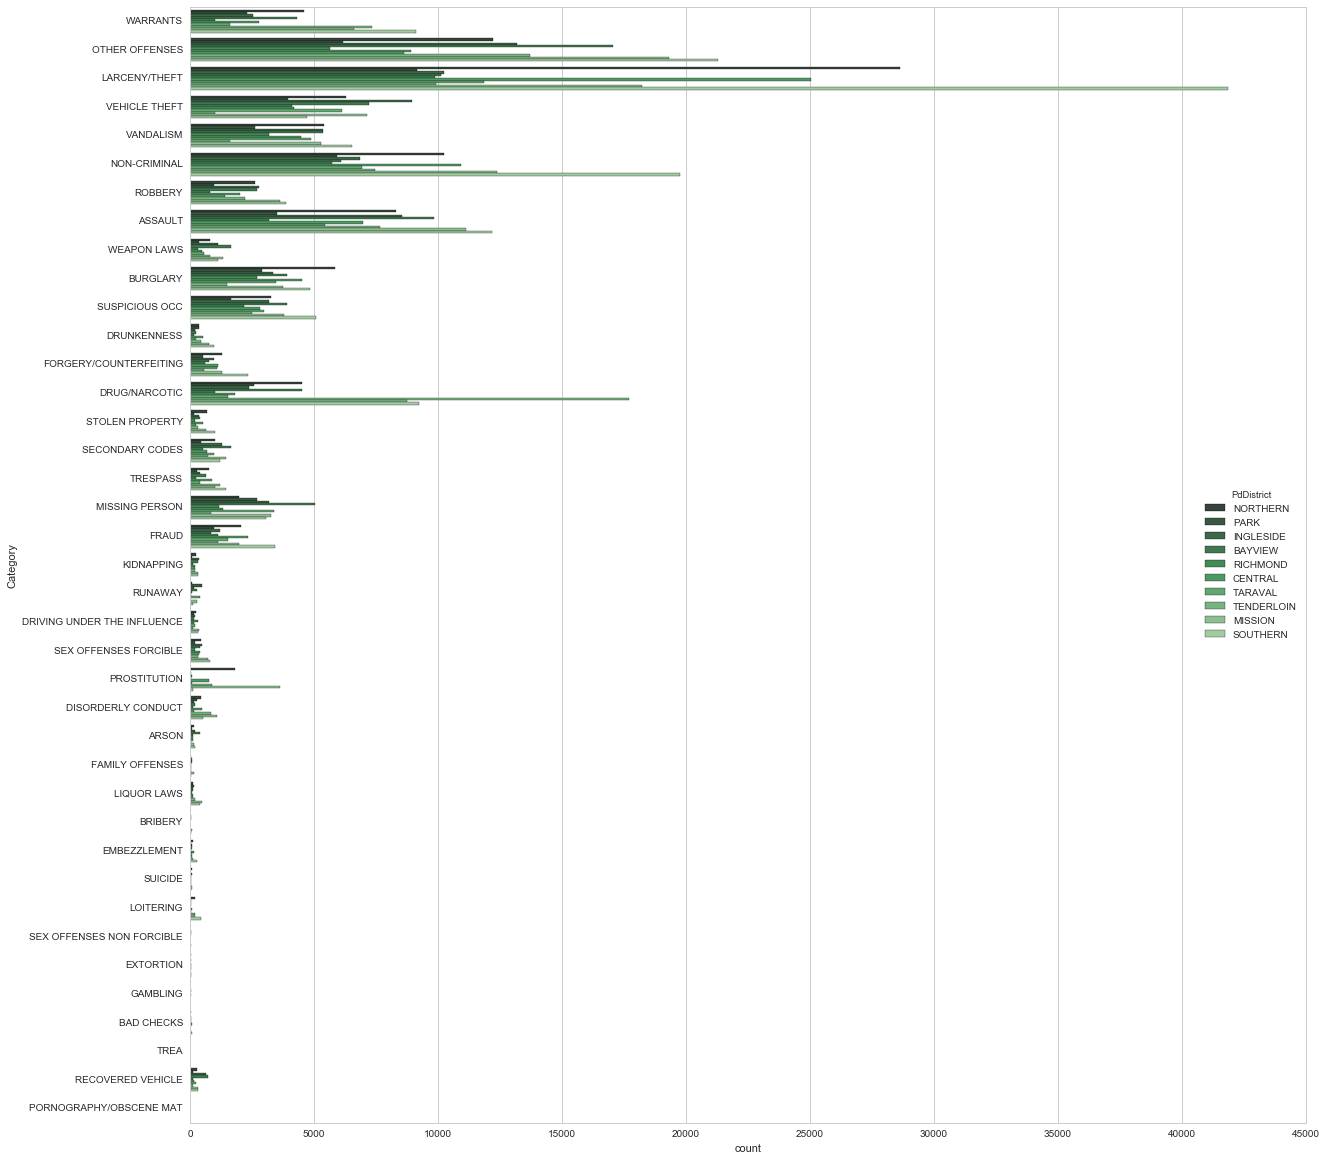

In [97]:

tt=train[train.PdDistrict=='SOUTHERN']
#tt=tt[:78]

fig, axis1 = plt.subplots(1,1,figsize=(20,20))
sns.countplot(y="Category", hue="PdDistrict", data=train, palette="Greens_d")


# Here, the Sourthern district clearly has the highest volume of crimes, while Richmond has the lowest.




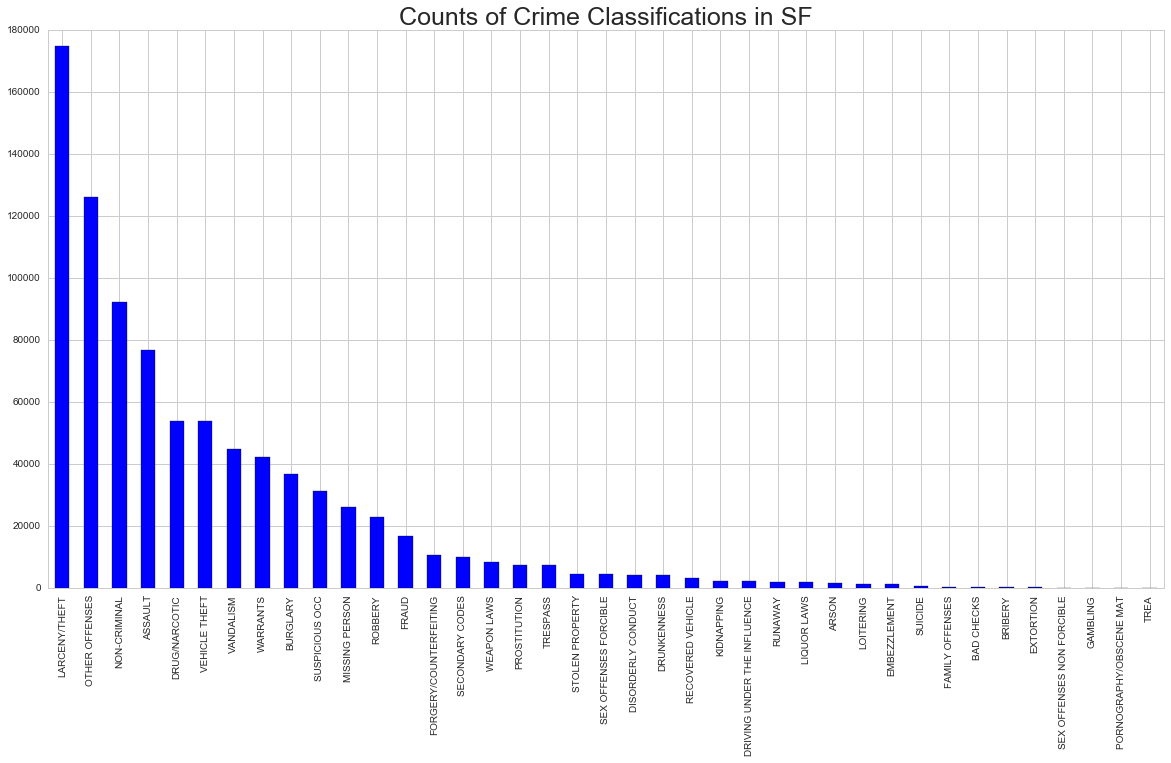

In [98]:
train.Category.value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Counts of Crime Classifications in SF',fontsize=25)


# Looking at crimes by category, larcency/theft also emerges as the most commonly reported crime.

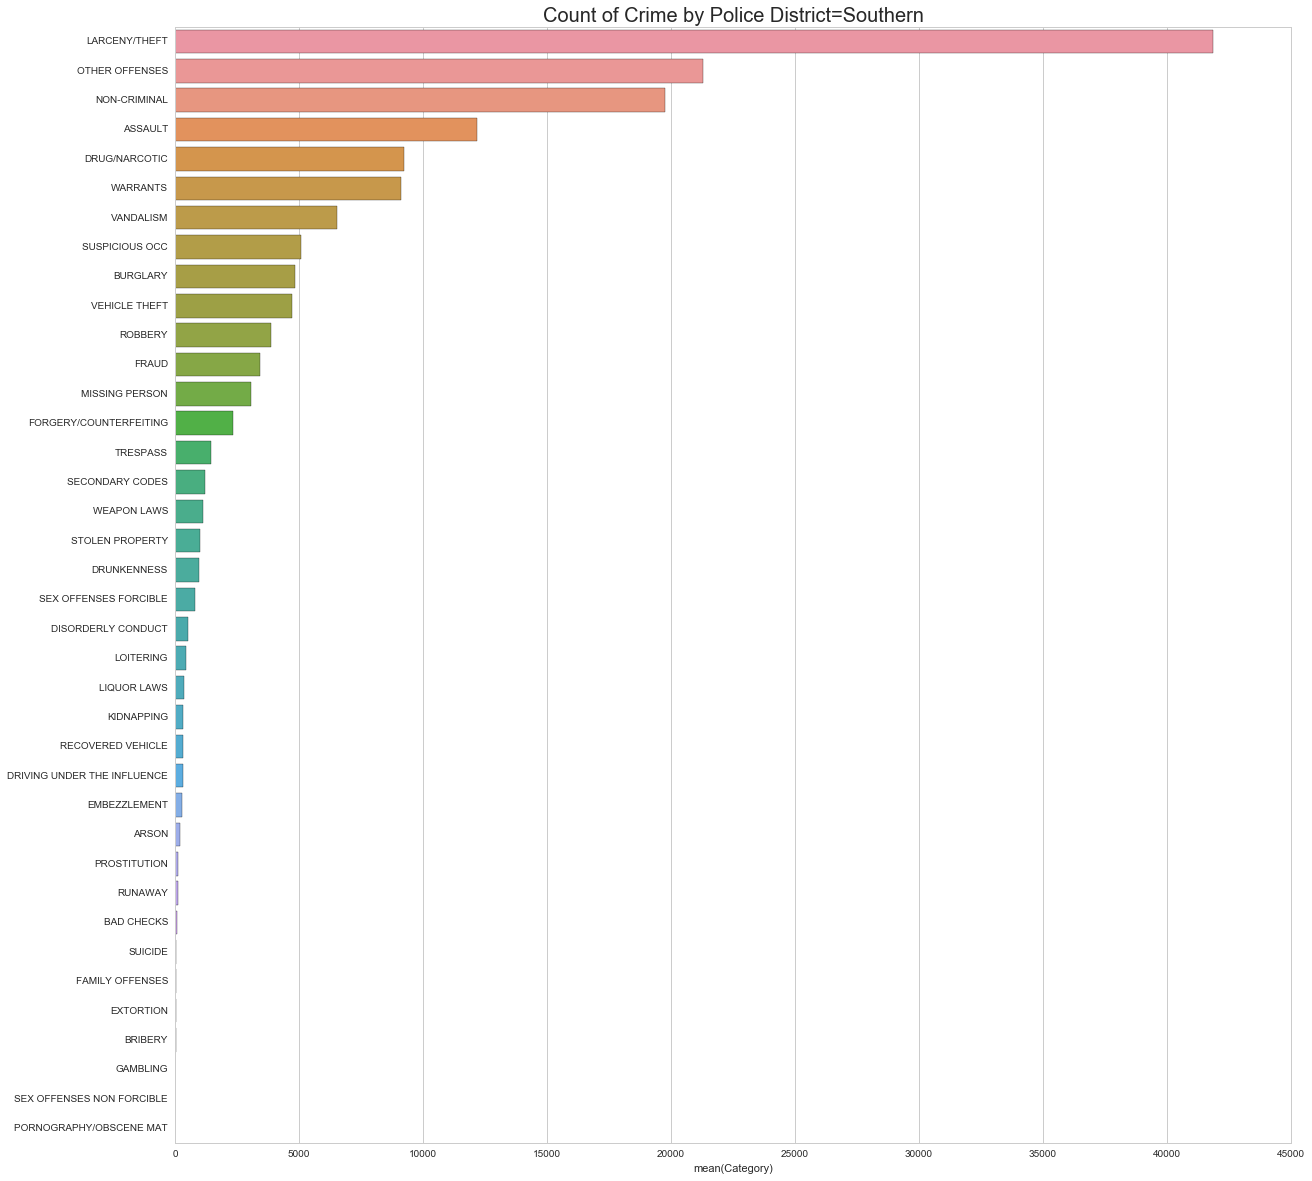

In [99]:

tt=train[train.PdDistrict=='SOUTHERN']
#tt=tt[:78]

fig, axis2 = plt.subplots(1,1,figsize=(20,20))
sns.barplot(x=tt.Category.value_counts(), y=tt.Category.value_counts().index)
sns.plt.title('Count of Crime by Police District=Southern', size=20)


# Looking at the Southern district, larceny/theft is also the top crime.

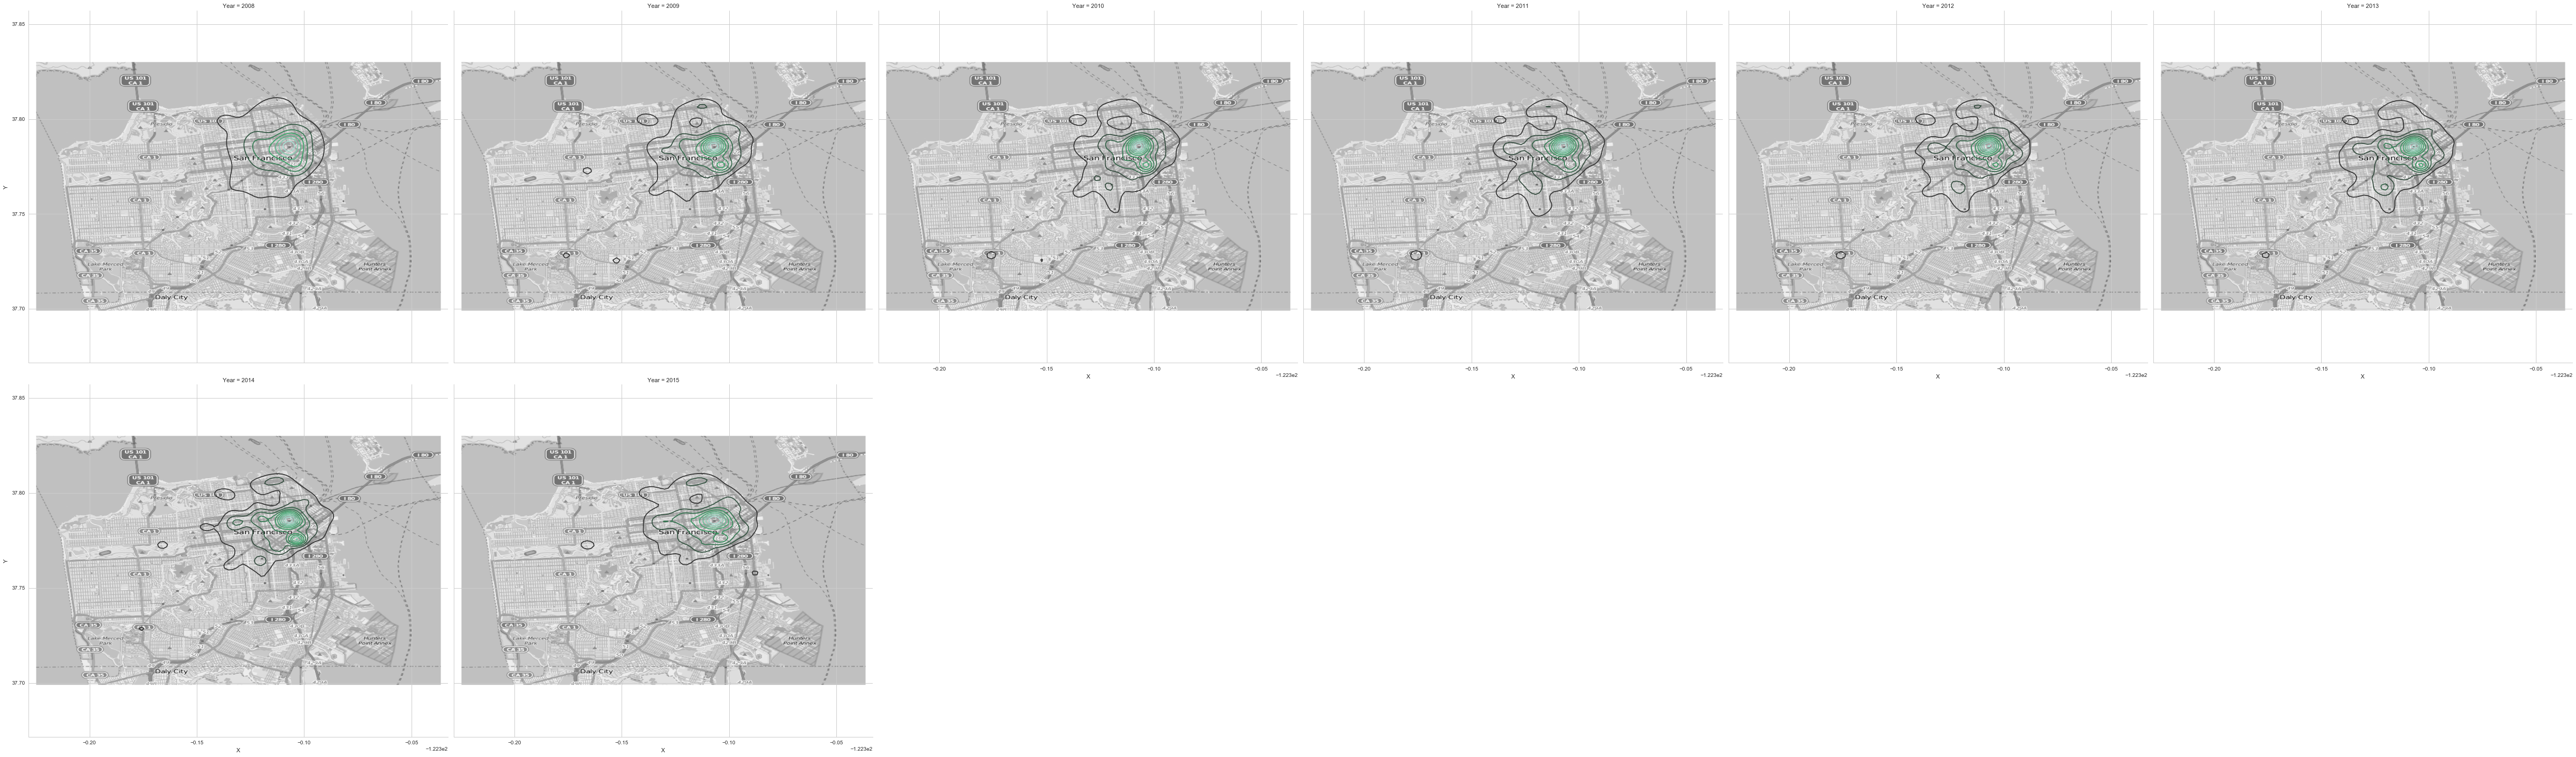

In [102]:
mapdata = np.loadtxt(".../SF Crime Data/sf_map_openstreetmap.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

fig = plt.figure(figsize=(50, 50))


#Removing bad Latitude/Longitude data
train['X'] = train[train.X<-121].X
train['Y'] = train[train.Y<40].Y
train = train.dropna()
train = train[train.Category == 'LARCENY/THEFT'] 
#train = train[1:100000] #Can slice if this runs too long

#Seaborn FacetGrid, can split by crime Category
g= sns.FacetGrid(train, col="Year", col_wrap=6, size=10, aspect=1/asp)

#Show the background map
for ax in g.axes:
    ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)
    
#Kernel Density Estimate plot
g.map(sns.kdeplot, "X", "Y", clip=clipsize)

plt.savefig('LarcenyTheftYear_density_plot.png')

# Digging into the larcency/theft data further, density plots of larcency/thefts broken out by year are below.  The hotspot of crime shift little from year to year, as expected.